##Customer Segmentation

Use clustering algorithm to perform customer segmentation on a dataset. Customer segmentation is a common technique used in marketing to divide customers into groups based on similar characteristics, such as purchasing behavior or demographics. By segmenting customers, businesses can gain valuable insights to tailor their marketing strategies, product offerings, and customer service.


About this file
Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

##Description of dataset

1. InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
4. InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
5. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
6. Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
!pip install squarify

##Import Libraries

In [2]:
import numpy as np
import pandas as pd
import time, warnings
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")
import io

##Load and Read Dataset

In [ ]:
market = pd.read_csv("/content/OnRetail.csv")
market.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49445 entries, 0 to 49444
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    49445 non-null  object 
 1   StockCode    49445 non-null  object 
 2   Description  49303 non-null  object 
 3   Quantity     49445 non-null  int64  
 4   InvoiceDate  49445 non-null  object 
 5   UnitPrice    49444 non-null  float64
 6   CustomerID   31563 non-null  float64
 7   Country      49444 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 3.0+ MB


In [ ]:
market.describe()

,Quantity,UnitPrice,CustomerID
count,49445.000000,49444.00000,31563.000000
mean,8.315239,6.45837,15423.016823
std,55.832343,167.43771,1753.298111
min,-9360.000000,0.00000,12347.000000
25%,1.000000,1.25000,14051.000000
50%,2.000000,2.51000,15464.000000
75%,8.000000,4.25000,17041.000000
max,2880.000000,16888.02000,18283.000000


In [ ]:
# Check for missing values
print(market.isnull().sum())

InvoiceNo          0
StockCode          0
Description      142
Quantity           0
InvoiceDate        0
UnitPrice          1
CustomerID     17882
Country            1
dtype: int64


In [ ]:
# Convert InvoiceDate to datetime, handling inconsistent hour formats
market['InvoiceDate'] = pd.to_datetime(market['InvoiceDate'], format='%d/%m/%Y %H:%M', errors='coerce')
# Instead of strftime, use dt.strftime on the Series
market['InvoiceDate'] = market['InvoiceDate'].dt.strftime('%d/%m/%Y %H:%M')
# Convert back to datetime after applying strftime
market['InvoiceDate'] = pd.to_datetime(market['InvoiceDate'], format='%d/%m/%Y %H:%M')

In [ ]:
# Handle duplicates
market.drop_duplicates(inplace=True)

In [ ]:
# Feature scaling

from sklearn.preprocessing import MinMaxScaler

# Select numerical features for scaling
numerical_features = ['Quantity', 'UnitPrice']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the numerical features
market[numerical_features] = scaler.fit_transform(market[numerical_features])

# Display the scaled data
print(market.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.765196   
1    536365     71053                  WHITE METAL LANTERN  0.765196   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.765359   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.765196   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.765196   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00   0.000151     17850.0  United Kingdom  
1 2010-12-01 08:26:00   0.000201     17850.0  United Kingdom  
2 2010-12-01 08:26:00   0.000163     17850.0  United Kingdom  
3 2010-12-01 08:26:00   0.000201     17850.0  United Kingdom  
4 2010-12-01 08:26:00   0.000201     17850.0  United Kingdom  


In [ ]:
# Encoding categorical variables

# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Country' column
market['Country'] = label_encoder.fit_transform(market['Country'])

# Display the encoded data
print(market.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  0.765196   
1    536365     71053                  WHITE METAL LANTERN  0.765196   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER  0.765359   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  0.765196   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  0.765196   

          InvoiceDate  UnitPrice  CustomerID  Country  
0 2010-12-01 08:26:00   0.000151     17850.0       23  
1 2010-12-01 08:26:00   0.000201     17850.0       23  
2 2010-12-01 08:26:00   0.000163     17850.0       23  
3 2010-12-01 08:26:00   0.000201     17850.0       23  
4 2010-12-01 08:26:00   0.000201     17850.0       23  


In [ ]:
market = market[market['Quantity']>0]
market.dropna(subset=['CustomerID'],how='all',inplace=True)

In [ ]:
market['date'] = pd.DatetimeIndex(market['InvoiceDate']).date
now = market['date'].max()

# Grouping data by 'CustomerID' and finding most recent purchase date for each customer
recency = market.groupby(by='CustomerID', as_index=False)['date'].max()
recency.columns = ['CustomerID','LastPurshaceDate']

# 'Recency' = 'now' - 'LastPurchaseDate'
recency['Recency'] = recency['LastPurshaceDate'].apply(lambda x: (now - x).days)
recency.head()

,CustomerID,LastPurshaceDate,Recency
0,12347.0,2010-12-07,33
1,12348.0,2010-12-16,24
2,12370.0,2010-12-17,23
3,12377.0,2010-12-20,20
4,12383.0,2010-12-22,18


In [ ]:
recency.drop('LastPurshaceDate',axis=1,inplace=True)

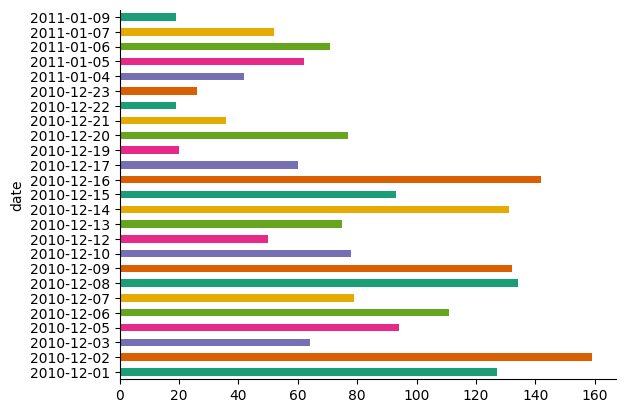

In [ ]:
market.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

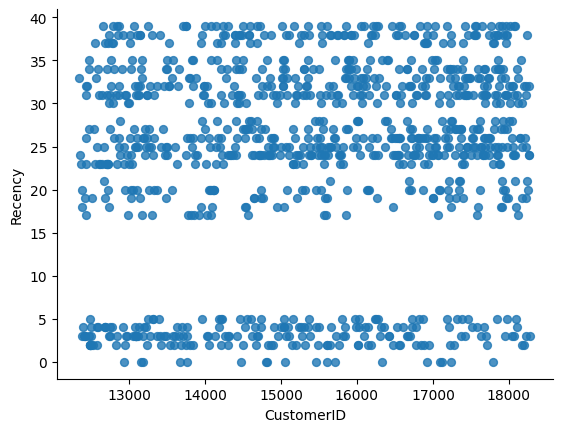

In [ ]:
from matplotlib import pyplot as plt
recency.plot(kind='scatter', x='CustomerID', y='Recency', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
market_c = market
market_c.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

#counting number of unique 'InvoiceNo' for each customer
frequency = market_c.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency.columns = ['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12347.0,1
1,12348.0,1
2,12370.0,2
3,12377.0,1
4,12383.0,1


In [ ]:
market['TotalCost'] = market['Quantity'] * market['UnitPrice']

#summing the 'TotalCost' for each customer
monetary = market.groupby(by='CustomerID',as_index=False).agg({'TotalCost': 'sum'})
monetary.columns = ['CustomerID','Monetary']
monetary.head()

,CustomerID,Monetary
0,12347.0,0.000095
1,12348.0,0.000025
2,12370.0,0.000501
3,12377.0,0.000211
4,12383.0,0.000057


In [ ]:
temp = recency.merge(frequency,on='CustomerID')
rfm= temp.merge(monetary,on='CustomerID')

rfm.set_index('CustomerID',inplace=True)
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12347.0,33,1,0.000095
12348.0,24,1,0.000025
12370.0,23,2,0.000501
12377.0,20,1,0.000211
12383.0,18,1,0.000057


In [ ]:
# Counting duplicate rows
duplicate_count = rfm.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 63


In [ ]:
rfm.drop_duplicates(inplace=True)

duplicate_count_new = rfm.duplicated().sum()
print("Number of duplicate rows:", duplicate_count_new)

Number of duplicate rows: 0


In [ ]:
print(rfm.isnull().sum())

Recency      0
Frequency    0
Monetary     0
dtype: int64


In [ ]:
rfm.describe()

,Recency,Frequency,Monetary
count,964.000000,964.000000,964.000000
mean,23.132780,1.960581,0.000487
std,11.895923,2.243834,0.001968
min,0.000000,1.000000,0.000007
25%,19.000000,1.000000,0.000088
50%,26.000000,1.000000,0.000211
75%,32.000000,2.000000,0.000451
max,39.000000,39.000000,0.050981


##Outlier detection and handling

In [ ]:
# Calculate the IQR for 'Quantity' and 'UnitPrice'
Q1_quantity = market['Quantity'].quantile(0.25)
Q3_quantity = market['Quantity'].quantile(0.75)
IQR_quantity = Q3_quantity - Q1_quantity

Q1_unitprice = market['UnitPrice'].quantile(0.25)
Q3_unitprice = market['UnitPrice'].quantile(0.75)
IQR_unitprice = Q3_unitprice - Q1_unitprice

# Define bounds for outliers
lower_bound_quantity = Q1_quantity - 1.5 * IQR_quantity
upper_bound_quantity = Q3_quantity + 1.5 * IQR_quantity

lower_bound_unitprice = Q1_unitprice - 1.5 * IQR_unitprice
upper_bound_unitprice = Q3_unitprice + 1.5 * IQR_unitprice

##Vizualize the Outliers

Text(0.5, 1.0, ' Distribution of Outliers')

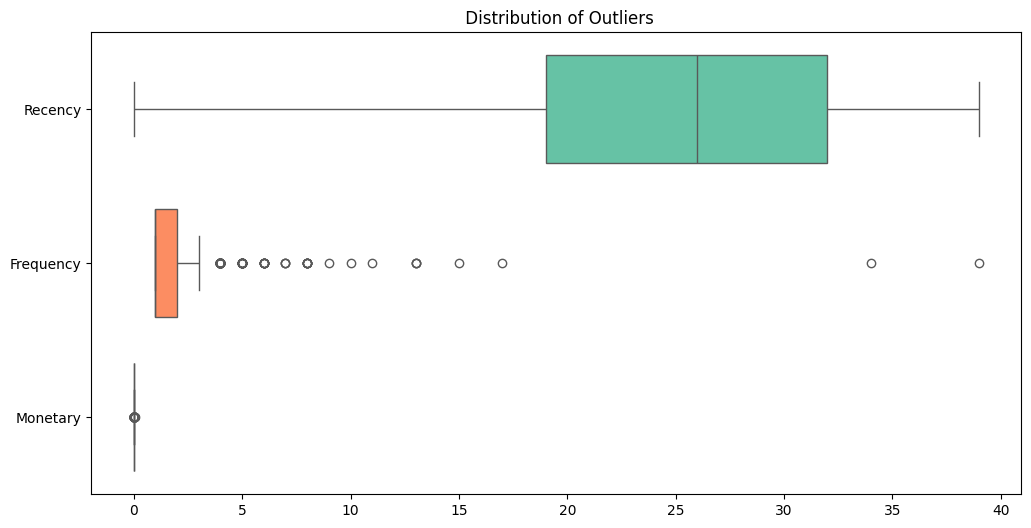

In [ ]:
#Boxplot to see outliers
attributes = ['Recency', 'Frequency', 'Monetary']

plt.figure(figsize=(12, 6))

sns.boxplot(data = rfm[attributes], orient="h", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title(" Distribution of Outliers", fontsize = 12)

The box plot shows there are outliers

In [ ]:
#Removing outliers
attributes = ['Monetary', 'Recency', 'Frequency']

for attribute in attributes:
    # Calculate quartiles and IQR
    Q1 = rfm[attribute].quantile(0.05)
    Q3 = rfm[attribute].quantile(0.95)
    IQR = Q3 - Q1

    # Remove outliers
    rfm = rfm[(rfm[attribute] >= Q1 - 1.5*IQR) & (rfm[attribute] <= Q3 + 1.5*IQR)]

In [ ]:

# Remove outliers
market = market[~((market['Quantity'] < lower_bound_quantity) | (market['Quantity'] > upper_bound_quantity))]
market = market[~((market['UnitPrice'] < lower_bound_unitprice) | (market['UnitPrice'] > upper_bound_unitprice))]

# Display cleaned data info
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1536 entries, 0 to 49430
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    1536 non-null   object        
 1   StockCode    1536 non-null   object        
 2   Description  1536 non-null   object        
 3   Quantity     1536 non-null   float64       
 4   InvoiceDate  1536 non-null   datetime64[ns]
 5   UnitPrice    1536 non-null   float64       
 6   CustomerID   1536 non-null   float64       
 7   Country      1536 non-null   int64         
 8   date         1536 non-null   object        
 9   TotalCost    1536 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 132.0+ KB


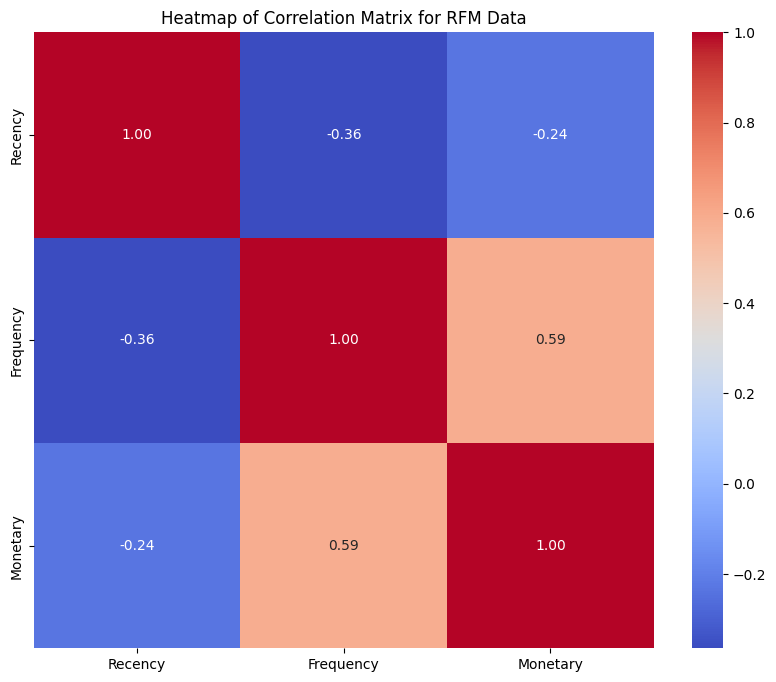

In [ ]:
# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(rfm.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Correlation Matrix for RFM Data')
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

rfm_cluster = pd.DataFrame(data=rfm)

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(rfm_cluster)

# Apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

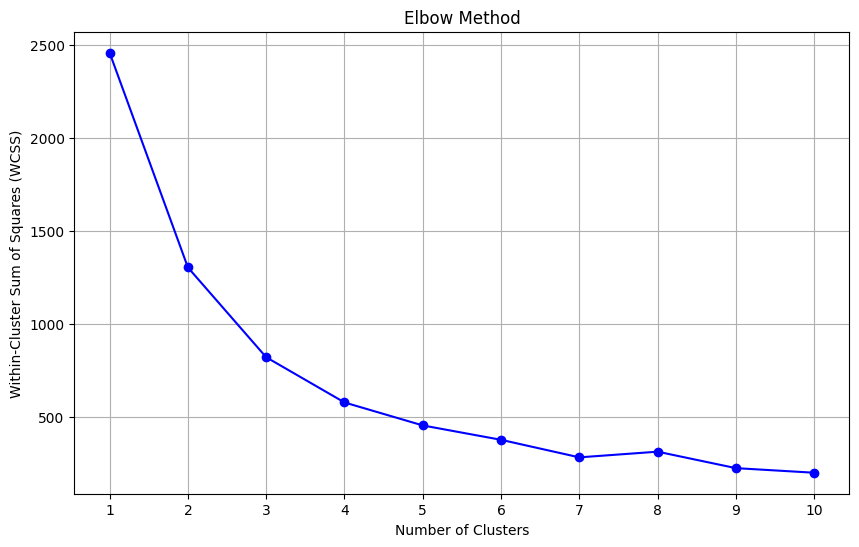

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

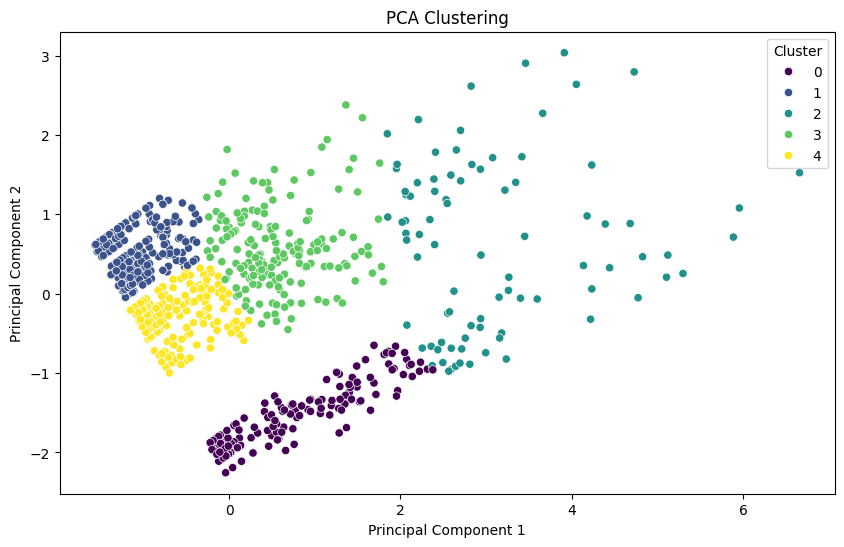

In [ ]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5)
kmeans.fit(pca_df)

pca_df['Cluster'] = kmeans.labels_

#Plot PCA Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('PCA Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Calculate mean values for each cluster
rfm_cluster['Cluster'] = kmeans.labels_
cluster_means = rfm_cluster.groupby('Cluster').mean()

print("Mean values for each cluster:")
print(cluster_means)

Mean values for each cluster:
           Recency  Frequency  Monetary
Cluster                                
0         2.980132   1.814570  0.000279
1        34.498316   1.087542  0.000156
2        12.802326   4.430233  0.001064
3        26.316384   2.406780  0.000524
4        24.055794   1.188841  0.000142


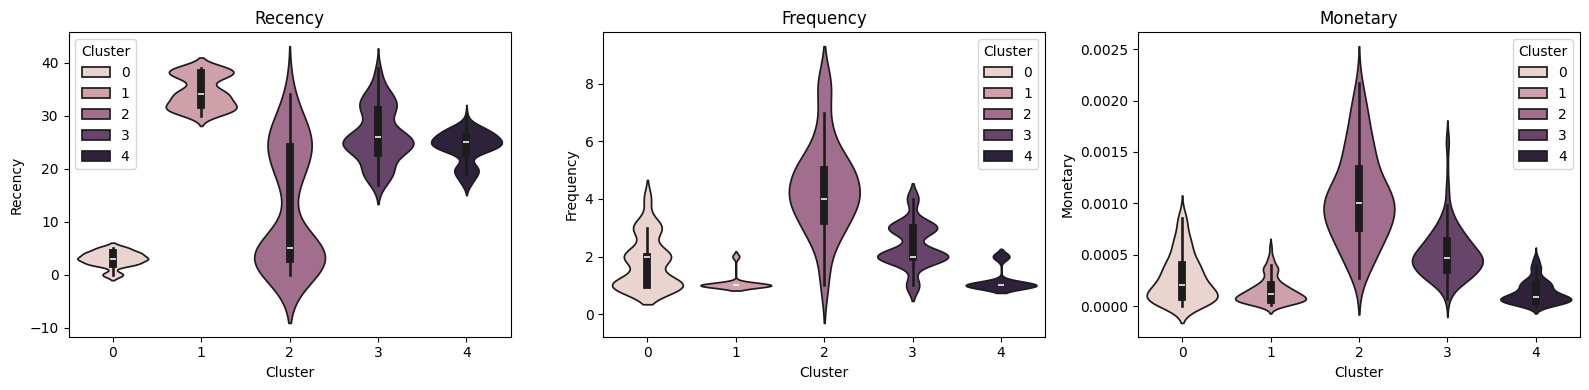

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

# Create catplot 'Recency'
sns.violinplot(data=rfm_cluster, x="Cluster", y="Recency", hue="Cluster", ax=axes[0])
axes[0].set_title('Recency')

# Create catplot 'Frequency'
sns.violinplot(data=rfm_cluster, x="Cluster", y="Frequency", hue="Cluster", ax=axes[1])
axes[1].set_title('Frequency')

# Create catplot 'Monetary'
sns.violinplot(data=rfm_cluster, x="Cluster", y="Monetary", hue="Cluster", ax=axes[2])
axes[2].set_title('Monetary')

plt.tight_layout()
plt.show()

In [ ]:
rfm['Cluster'] = kmeans.labels_

In [ ]:
segment_names = {
    0: 'Inactive Shoppers',
    1: 'Occasional Shoppers',
    2: 'Frequent Spenders',
    3: 'High-Value Loyal Shoppers',
    4: 'Regular Shoppers' }

# Map the cluster values to segment names
rfm['Segment'] = rfm['Cluster'].map(segment_names)
print(rfm)

            Recency  Frequency  Monetary  Cluster                    Segment
CustomerID                                                                  
12347.0          33          1  0.000095        1        Occasional Shoppers
12348.0          24          1  0.000025        4           Regular Shoppers
12370.0          23          2  0.000501        3  High-Value Loyal Shoppers
12377.0          20          1  0.000211        4           Regular Shoppers
12383.0          18          1  0.000057        4           Regular Shoppers
...             ...        ...       ...      ...                        ...
18256.0          20          1  0.000038        4           Regular Shoppers
18259.0          32          1  0.000095        1        Occasional Shoppers
18260.0          24          1  0.000224        4           Regular Shoppers
18269.0          24          2  0.000435        3  High-Value Loyal Shoppers
18283.0           3          1  0.000038        0          Inactive Shoppers

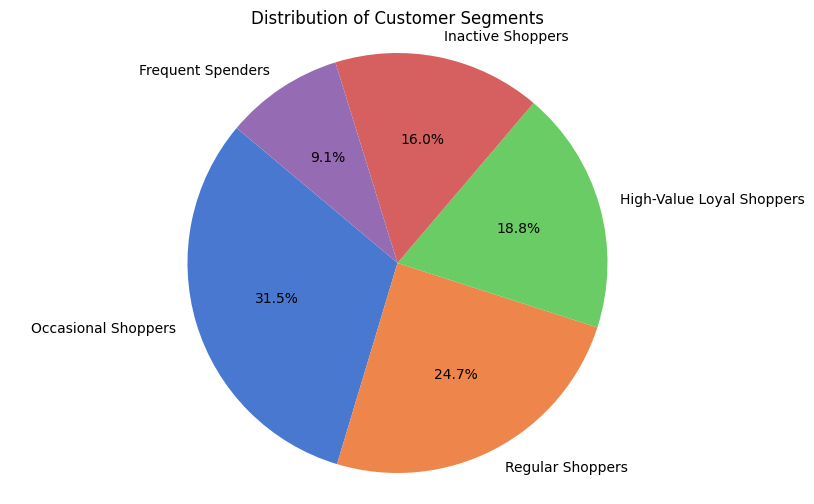

In [ ]:
import matplotlib.pyplot as plt

segment_counts = rfm['Segment'].value_counts()

# legend
legend_labels = [f'{segment} ({count})' for segment, count in segment_counts.items()]

plt.figure(figsize=(10, 6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted', len(segment_counts)))
plt.title('Distribution of Customer Segments')
plt.axis('equal')

plt.show()

In [ ]:
#rfm = rfm.drop('Cluster', axis=1)
rfm.to_csv("customer_segments.csv")